# Stack Overflow Survey Trends

   In this project, we will be looking at a dataset about a developer survey, clean it, analyse it, and make visualizations based on it in order to draw insightful conclusions. 

### Exploring the Data

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing the dataset
df = pd.read_csv('developer_dataset.csv')

# viewing columns
print(df.columns)

# inspecting few rows
print(df.head(5))

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')
   RespondentID  Year        Country          Employment  \
0             1  2018  United States  Employed full-time   
1             1  2019  United States  Employed full-time   
2             1  2020  United States  Employed full-time   
3             2  2018  United States  Employed full-time   
4             2  2019  United States  Employed full-time   

                                      UndergradMajor  \
0  Computer science, computer engineering, or sof...   
1  Computer science, computer engineering, or sof...   
2  Computer science, computer engineering, or sof...  

C:\Users\moham\AppData\Local\Temp\ipykernel_9836\3464615808.py:7: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/developer_dataset.csv')


In [2]:
# counting rows for each column
print(df.count())

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64


In [3]:
# summary statistic of numerical values
df.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


Notice how `WorkWeekHrs` has more missing data than the other numerical column, eventhough it gives very interesting insights about how much time developers work a week. `YearsCodePro` also provides good information for understanding the impact of years of experience on other features.

### Handling Missing Values

In [4]:
# the percentage of missing data for each column

maxRows = df['RespondentID'].count()

print('% Missing data:')
print((1 - df.count() / maxRows) * 100)

% Missing data:
RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


Let's use this result to assume that it is safe for us to delete the following columns `NEWJobHunt`, `NEWJobHuntResearch` and `NEWLearn`.

In [5]:
# deleting columns

df.drop(
    ['NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn'],
    axis=1,
    inplace=True
)

### Analyzing developers by country

                RespondentID
Country                     
Canada                  8979
China                   2072
France                  6861
Germany                16215
Japan                   1049
Mexico                  1918
Spain                   4534
United Kingdom         15854
United States          53727


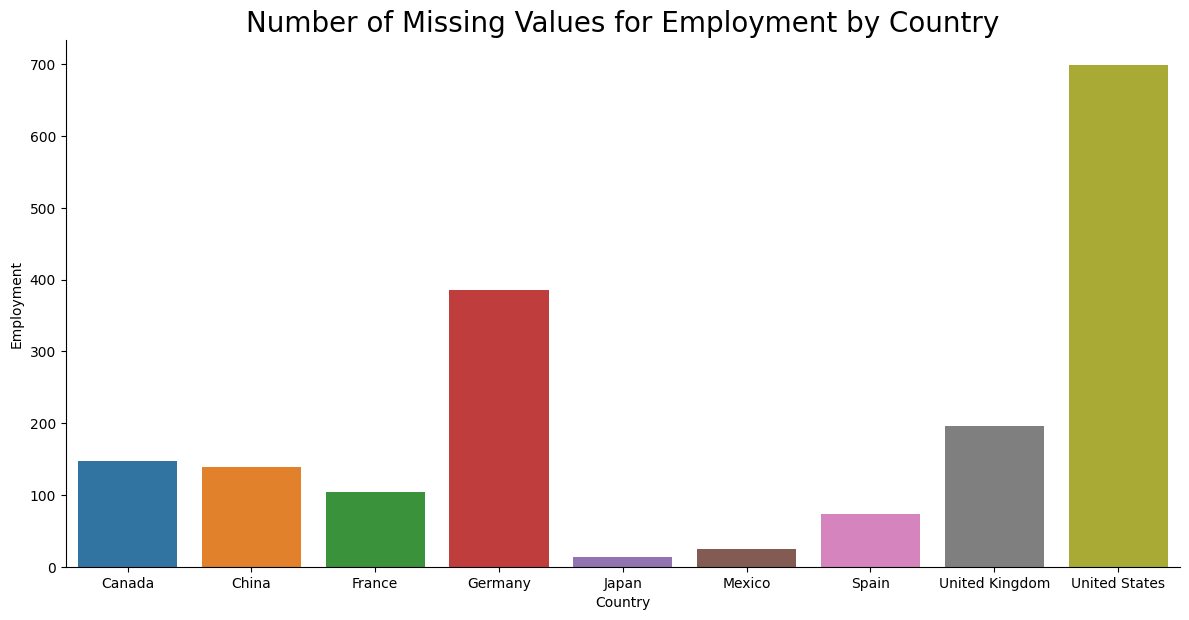

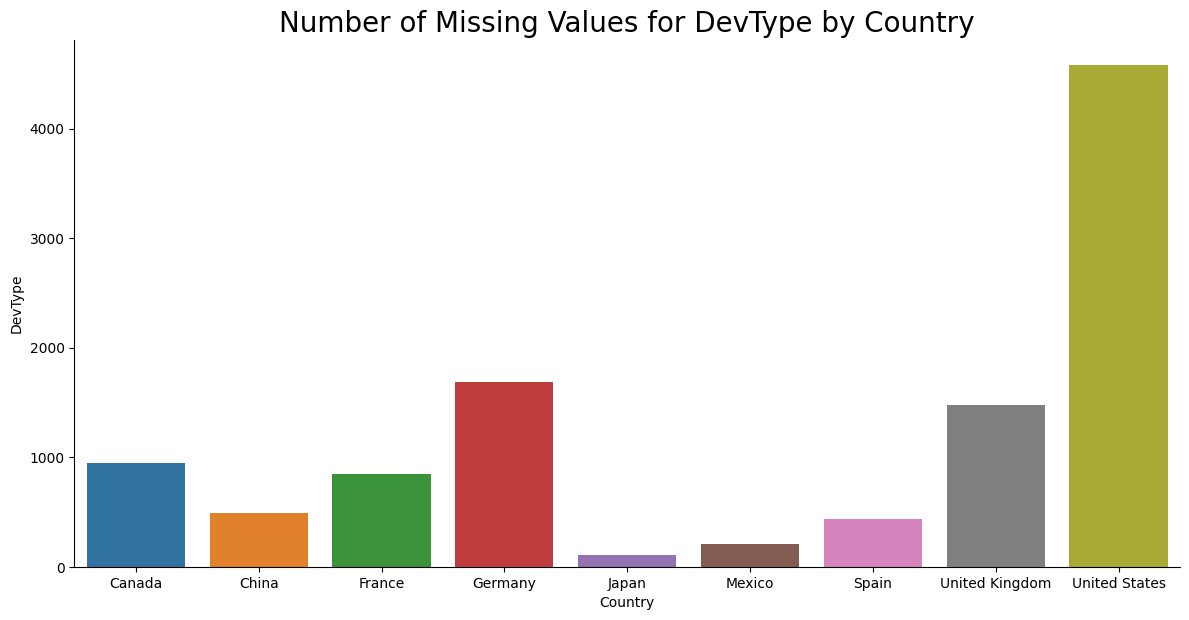

In [6]:
# Let's check how many missing data there are at a country level

print(df[['RespondentID', 'Country']].groupby('Country').count())
missing_data = df[['Employment', 'DevType']].isnull().groupby(df['Country']).sum().reset_index()

sns.catplot(
    data=missing_data,
    kind='bar',
    x='Country',
    y='Employment',
    height=6,
    aspect=2
)
plt.title('Number of Missing Values for Employment by Country', fontsize=20)
sns.catplot(
    data=missing_data,
    kind='bar',
    x='Country',
    y='DevType',
    height=6,
    aspect=2
)
plt.title('Number of Missing Values for DevType by Country', fontsize=20)
plt.show()

The data doesn't seem to be missing for any country more than the others, the size of missing data points is relative to the number of developers from each country (which means that USA and Germany have the most developers).
We could categorize these missing data as MCAR (missing completely at random), meaning that any observation is equally likely to be missing, and we can safely delete them.

In [7]:
# pairwise deletion
df.dropna(subset = ['Employment', 'DevType'], how='any', inplace=True)

Let's analyze the distribution of employment and developer types by country.

C:\Users\moham\AppData\Local\Temp\ipykernel_9836\2801133391.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
C:\Users\moham\AppData\Local\Temp\ipykernel_9836\2801133391.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
C:\Users\moham\AppData\Local\Temp\ipykernel_9836\2801133391.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

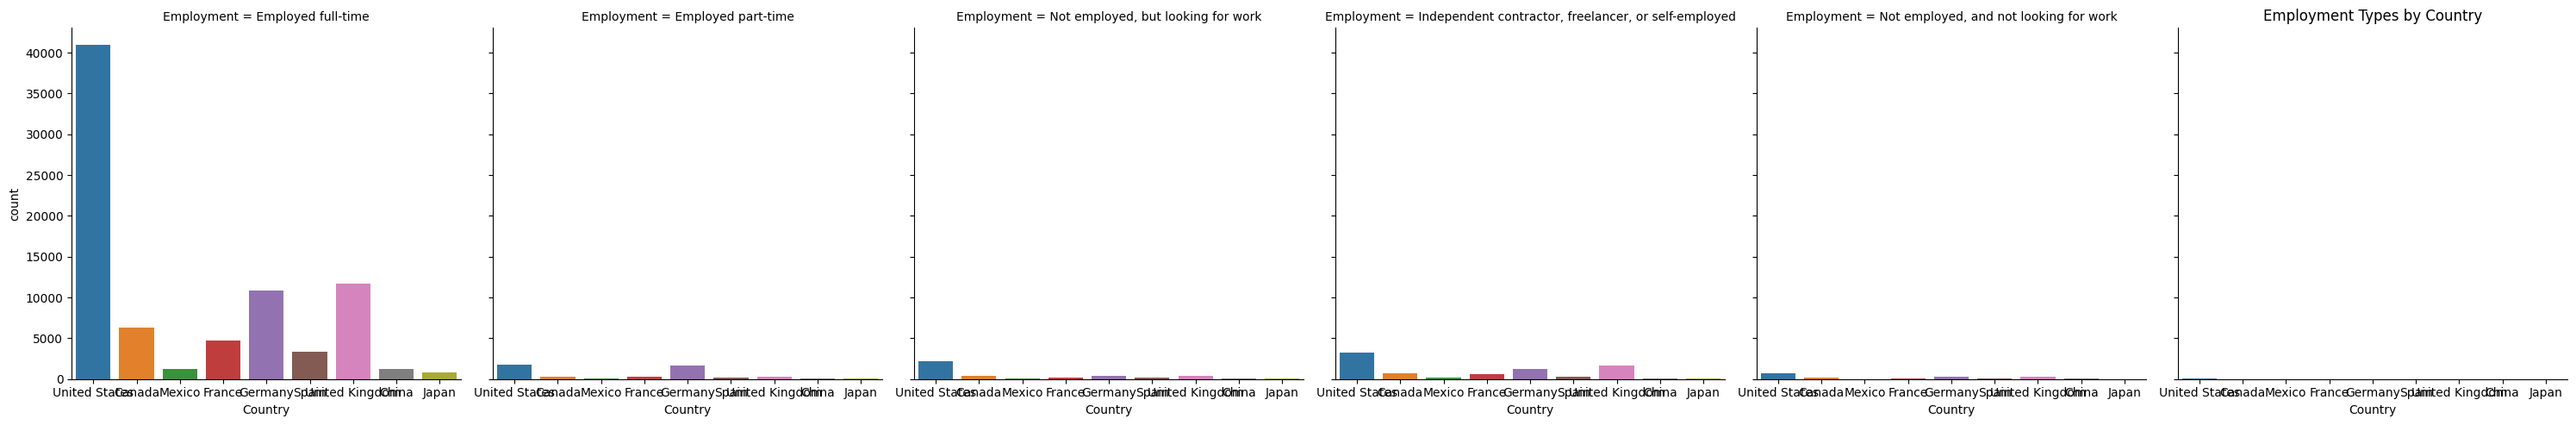

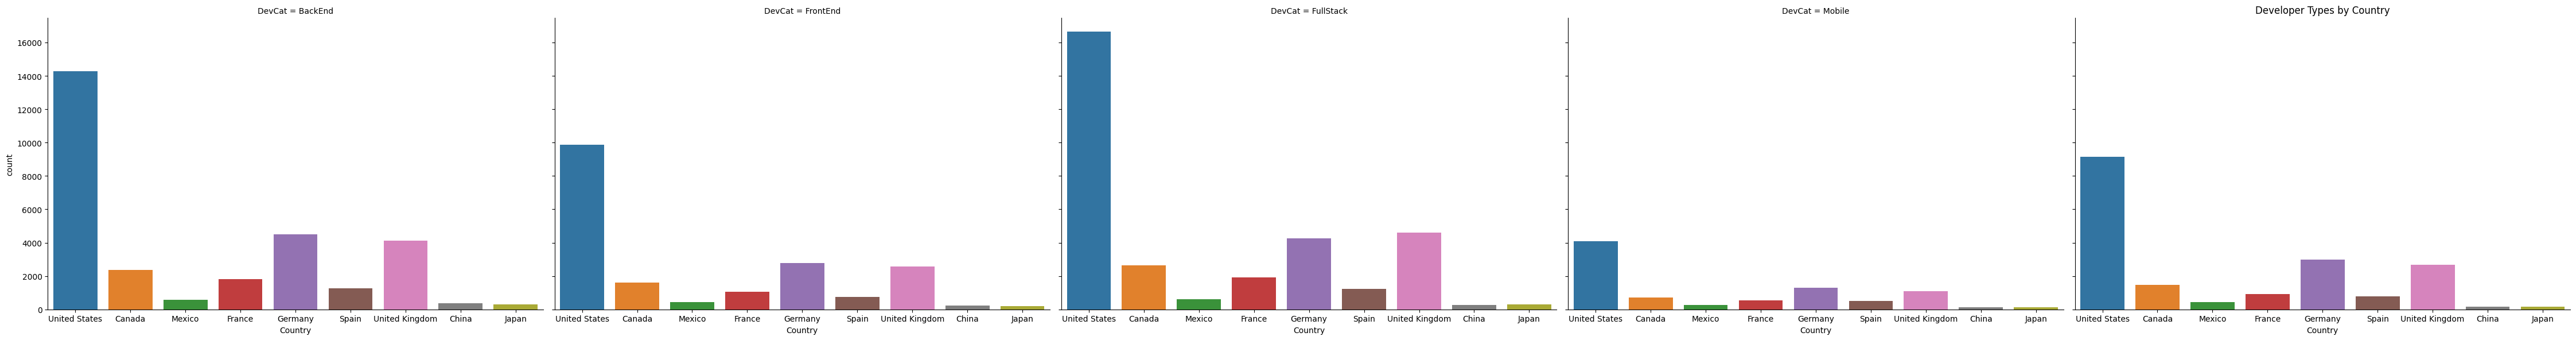

In [8]:
# Employment by country
sns.catplot(
    data=df,
    x='Country',
    col='Employment',
    kind='count'
)
plt.title('Employment Types by Country')

# Developer types by country
# let's start by limiting the roles to the most popular ones:
#   Front-end
#   Back-end
#   Full-stack
#   Mobile development
#   Administration Roles

devdf = df[['Country', 'DevType']]
devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
devdf.loc[devdf['DevType'].str.contains('full-stack'), 'FullStack'] = True
devdf.loc[devdf['DevType'].str.contains('mobile'), 'Mobile'] = True
devdf.loc[devdf['DevType'].str.contains('administrator'), 'Admin'] = True

devdf = devdf.melt(id_vars=['Country'], 
    value_vars=['BackEnd','FrontEnd','FullStack','Mobile','Admin'], 
    var_name='DevCat',
    value_name='DevFlag')

devdf.dropna(how='any', inplace=True)

sns.catplot(
    data=devdf,
    x='Country',
    col='DevCat',
    kind='count',
    height=6,
    aspect=1.5
)
plt.title('Developer Types by Country')
plt.show()

The majority of workers are full time developers, and the majority of developers have skill sets in front-end, back-end or full-stack.

### Investigating Developer Undergraduate Majors

Let's start by looking at the missingness of the missing data on the `UndergradMajor` column.

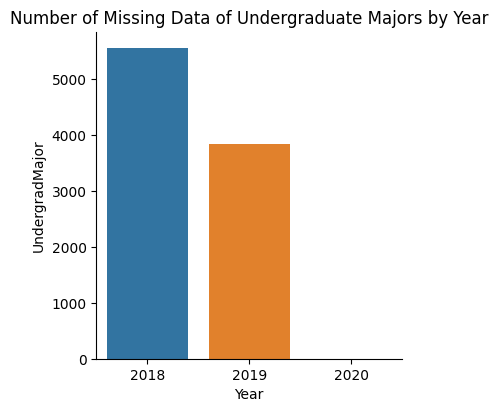

In [9]:
missingUndergrad = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()

sns.catplot(
    data=missingUndergrad,
    x='Year',
    y='UndergradMajor',
    kind='bar',
    height=4,
    aspect=1
)
plt.title('Number of Missing Data of Undergraduate Majors by Year')
plt.show()

There are no missing data at the year 2020, meaning that the missingness couldn't be completely random.

In [10]:
# sorting observations for a correct backward carriage
df = df.sort_values(['RespondentID', 'Year'])

df['UndergradMajor'].bfill(axis=0, inplace=True)

Analyzinf major dsitributions for each year.

C:\Users\moham\AppData\Local\Temp\ipykernel_9836\2869584295.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.dropna(how='any', inplace=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_9836\2869584295.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
C:\Users\moham\AppData\Local\Temp\ipykernel_9836\2869584295.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

   Year          EduCat  EduFlag
0  2018          ComSci    25510
1  2018  NaturalScience     2171
2  2018         NoMajor      487
3  2018        OtherEng     3054
4  2018   SocialScience     1112


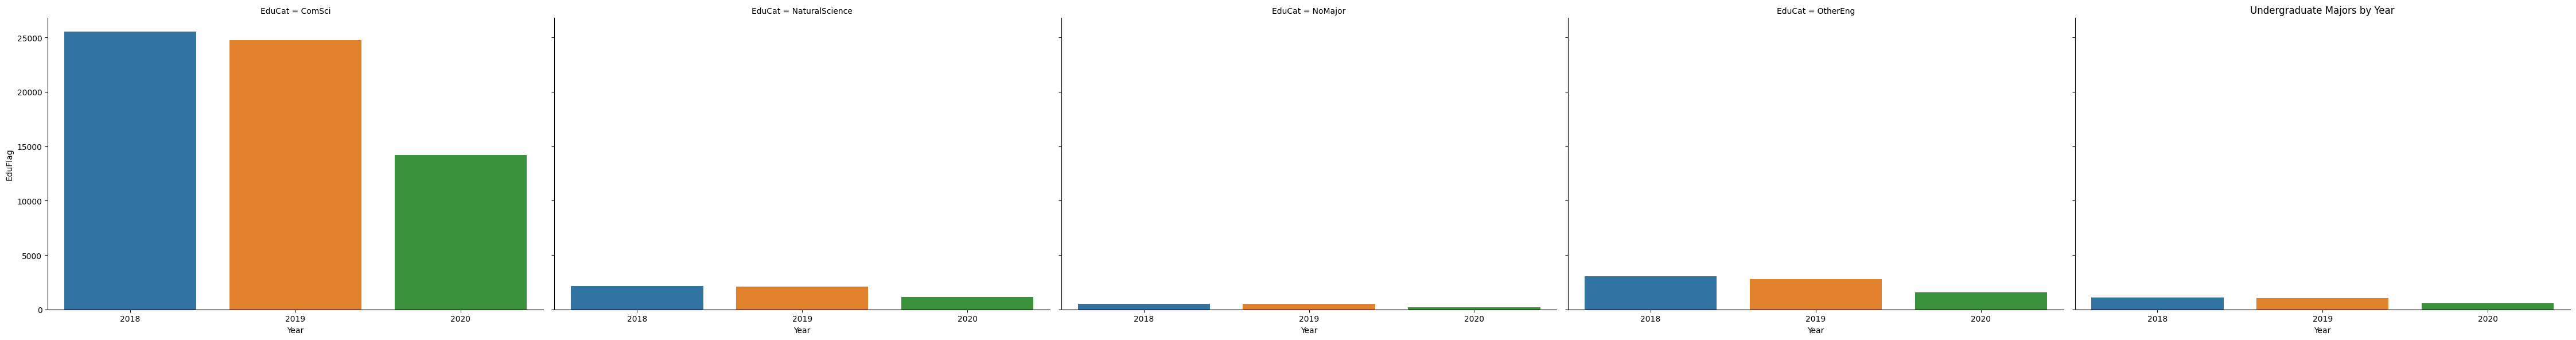

In [11]:
# Key major groups outlined in the Stack Overflow survey
majors = ['social science','natural science','computer science','development','another engineering','never declared']

edudf = df[['Year', 'UndergradMajor']]
edudf.dropna(how='any', inplace=True)
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True

edudf = edudf.melt(
    id_vars=['Year'],
    value_vars=['SocialScience', 'NaturalScience', 'ComSci', 'OtherEng', 'NoMajor'],
    var_name='EduCat',
    value_name='EduFlag'
)

edudf.dropna(how='any', inplace=True)
edudf = edudf.groupby(['Year','EduCat']).count().reset_index()
print(edudf.head())
sns.catplot(
    data=edudf,
    x='Year',
    y='EduFlag',
    col='EduCat',
    kind='bar',
    height=6,
    aspect=1.5)
plt.title('Undergraduate Majors by Year')
plt.show()

Most of the people who enter the workforce for development have their background in computer science, and this number declined over the years.

### The Relationship Between Years of Experience and Compensation

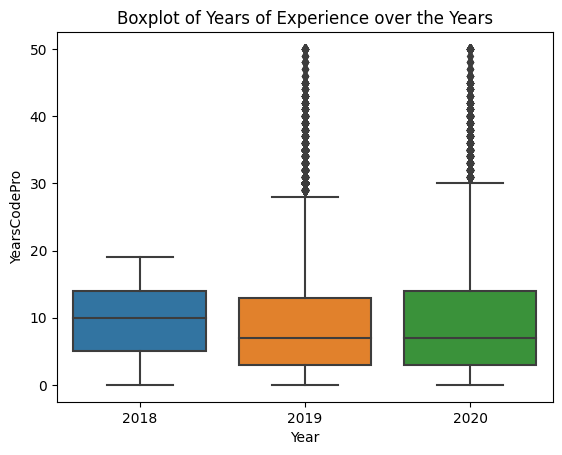

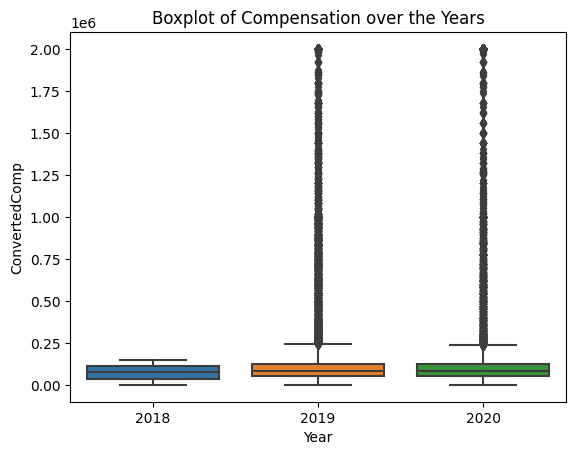

In [12]:
compFields = df[['Year', 'YearsCodePro', 'ConvertedComp']]

sns.boxplot(
    data=compFields,
    x='Year',
    y='YearsCodePro'
)
plt.title('Boxplot of Years of Experience over the Years')
plt.show()

sns.boxplot(
    data=compFields,
    x='Year',
    y='ConvertedComp'
)
plt.title('Boxplot of Compensation over the Years')
plt.show()

The distributions remain consistent over the years, which could indicates that there is a strong correlation between data points.
This is why we might think of multiple imputation for filling in missing data.

In [14]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

imputedf = df[['YearsCodePro', 'ConvertedComp']]

traindf, testdf = train_test_split(imputedf, train_size=0.1)

# creating the iterative imputer to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)

# fitting the model on the test dataset
imp.fit(imputedf)

# transforming the model on the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(imputedf), 0), columns=['YearsCodePro', 'ConvertedComp'])

C:\Users\moham\AppData\Local\Temp\ipykernel_9836\1065686740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compPlotdf['CodeYearsBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)


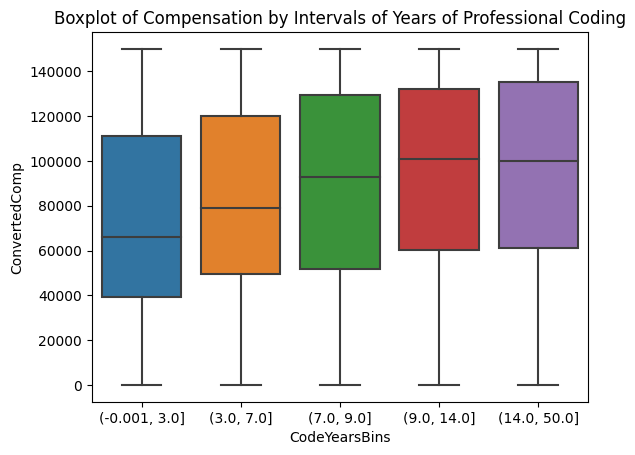

In [18]:
compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000]
compPlotdf['CodeYearsBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)

sns.boxplot(
    data=compPlotdf,
    x='CodeYearsBins',
    y='ConvertedComp'
)
plt.title('Boxplot of Compensation by Intervals of Years of Professional Coding')
plt.show()

This plot shows that, while the intervals of compensation is nearly identical for all intervals of years, people with more coding experience tend on average to make more money.